In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

In [2]:
a = [0, 1]
d = ['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
set_d =  ['A', 2, 3, 4, 5, 6, 7, 8, 9, 10]
r = {x: {i: {j: [0, 0] for j in set_d} for i in range(11, 22)} for x in ['A', 'NA']}
c = {x: {i: {j: [0, 0] for j in set_d} for i in range(11, 22)} for x in ['A', 'NA']}
p = {x: {i: {j: 1 for j in set_d} for i in range(11, 22)} for x in ['A', 'NA']}
v = {x:int(x) if x != 'A' else 11 for x in d}

In [3]:
class Blackjack:
    def __init__(self, deck, actions, values, returns, pi, count):
        self.deck = deck
        self.actions = actions
        self.values = values
        self.returns = returns
        self.pi = pi
        self.count = count
    
    def play_game(self, n=10**8):
        for i in range(n):
            if i % 10**7 == 0:
                print(i)
            self.play_hand()     
            
    def play_hand(self):
        # Create list of states visited and actions taken
        states_visited = []
        actions_taken = []
        # Draw 2 cards for player, 1 for dealer
        hand = random.sample(self.deck, 2)
        dealer_hand = [random.choice(self.deck)]
        first_d = dealer_hand[0]
        # Choose one of the two action at random
        action = random.choice(self.actions)
        # Check for blackjack
        val = get_val(hand, self.values)
        has_ace = 'A' if 'A' in hand else 'NA'
        if val == 21:
            complete = True
            dealer_hand.append(random.choice(self.deck))
            dealer_val = get_val(dealer_hand, self.values)
            if dealer_val == 21:
                reward = 0
            else:
                reward = 1
            states_visited = [[has_ace, val, first_d]]
            actions_taken = [0]
        # If caeds are worth less than 10, take a hit
        while val <= 10:
            hand.append(random.choice(self.deck))
            val = get_val(hand, self.values)
        # Play the hand
        complete = False
        while not complete:
            states_visited.append([has_ace, val, first_d])
            actions_taken.append(action)
            # Perform the hit action
            if action == 1:
                hand.append(random.choice(self.deck))
            has_ace = 'A' if 'A' in hand else 'NA'
            val = get_val(hand, self.values)
            if val > 21 and has_ace == 'A':
                val -= 10
                has_ace = 'NA'
            if val > 21:
                reward = -1
                complete = True
            elif action == 0 and val <= 21:
                complete = True
                dealer_val = get_val(dealer_hand, self.values)
                while dealer_val < 17:
                    dealer_hand.append(random.choice(self.deck))
                    dealer_val = get_val(dealer_hand, self.values)
                    has_ace = 'A' if 'A' in dealer_hand else 'NA'
                    if dealer_val > 21 and has_ace == 'A':
                        dealer_val -= 10
                if dealer_val > 21:
                    reward = 1
                elif dealer_val < val:
                    reward = 1
                elif dealer_val > val:
                    reward = -1
                else:
                    reward = 0
                complete = True
            else:
                action = self.pi[has_ace][val][first_d]
        for i, state in enumerate(states_visited):
            self.count[state[0]][state[1]][state[2]][actions_taken[i]] += 1
            self.returns[state[0]][state[1]][state[2]][actions_taken[i]] += 1/(self.count[state[0]][state[1]][state[2]][actions_taken[i]])*(reward-self.returns[state[0]][state[1]][state[2]][actions_taken[i]])
            self.pi[state[0]][state[1]][state[2]] = self.returns[state[0]][state[1]][first_d].index(max(self.returns[state[0]][state[1]][state[2]]))


def get_val(hand, values):
    return sum([values[card] for card in hand])   


In [4]:
test = Blackjack(d, a, v, r, p, c)

In [5]:
test.play_game()

0
10000000
20000000
30000000
40000000
50000000
60000000
70000000
80000000
90000000


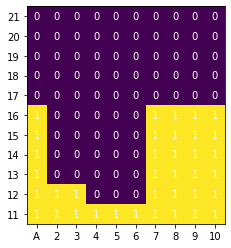

In [6]:
x = [str(x) for x in set_d]
y = [str(x) for x in range(21, 10, -1)]
order = list(test.pi['NA'].keys())
order.reverse()
z = np.array([list(test.pi['NA'][a].values()) for a in order])
fig, ax = plt.subplots()
im = ax.imshow(z)
ax.set_xticks(np.arange(len(x)))
ax.set_yticks(np.arange(len(y)))
ax.set_xticklabels(x)
ax.set_yticklabels(y)

# Loop over data dimensions and create text annotations.
for i in range(len(y)):
    for j in range(len(x)):
        text = ax.text(j, i, z[i, j],
                       ha="center", va="center", color="w")


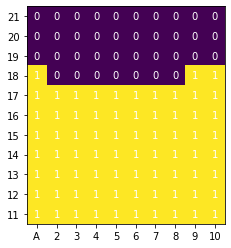

In [7]:
x = [str(x) for x in set_d]
y = [str(x) for x in range(21, 10, -1)]
order = list(test.pi['A'].keys())
order.reverse()
z = np.array([list(test.pi['A'][a].values()) for a in order])
fig, ax = plt.subplots()
im = ax.imshow(z)
ax.set_xticks(np.arange(len(x)))
ax.set_yticks(np.arange(len(y)))
ax.set_xticklabels(x)
ax.set_yticklabels(y)

# Loop over data dimensions and create text annotations.
for i in range(len(y)):
    for j in range(len(x)):
        text = ax.text(j, i, z[i, j],
                       ha="center", va="center", color="w")
